# Take Home Project: Part 1

## Data Exploration

In [1]:
#Importing necessary modules
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing and converting csv to pandas dataframe for initial data exploration and analysis
#Note: previous checks were done outside of this notebook to ensure initial csv wasn't too large for upload to notebook
subj_measures = pd.read_csv("subj_measures.csv")

#Test Print
subj_measures.head()

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,2348,mood,2.76
1,2019-06-13T16:33:34.399Z,5232,sleep,2.44
2,2018-12-26T14:24:00.436Z,4209,sleep,1.88
3,2019-07-17T20:11:23.792Z,2802,mood,2.20
4,2019-05-09T17:27:50.900Z,2025,mood,4.00


In [3]:
#Confirming datatypes are in expected format and there are no missing values
print(subj_measures.dtypes) #All data look to be of the expected or usable datatypes, though the "date" column should be in datetime format, which will be converted
print("")
print(subj_measures.isnull().values.any()) #There is no missing data either so data exploration can begin

date        object
user_id      int64
type        object
value      float64
dtype: object

False


In [4]:
#Converting "date" column to datetime format.  Due to format, inference could be used for time conversion, though nanoseconds may need to be removed for plotting
subj_measures['date'] = subj_measures['date'].str.replace('T', ' ') #removing T and nanoseconds for smoother datetime exploration
subj_measures['date'] = subj_measures['date'].str.replace('\d{3}Z$', '')
subj_measures['date'] = subj_measures['date'].str.replace('.', '')

subj_measures.head()

,date,user_id,type,value
0,2019-06-08 23:19:34,2348,mood,2.76
1,2019-06-13 16:33:34,5232,sleep,2.44
2,2018-12-26 14:24:00,4209,sleep,1.88
3,2019-07-17 20:11:23,2802,mood,2.20
4,2019-05-09 17:27:50,2025,mood,4.00


In [5]:
subj_measures['date'] = pd.to_datetime(subj_measures['date'], format="%Y-%m-%d %H:%M:%S") #converting from string object to datetime object

subj_measures.dtypes #confirming conversion was correct

date       datetime64[ns]
user_id             int64
type               object
value             float64
dtype: object

In [6]:
#Segmenting time data by hour, day and month
#Note that this could have been done to other groupings of the data as well.
subj_measures['hour'] = subj_measures['date'].dt.hour
subj_measures['day'] = subj_measures['date'].dt.day
subj_measures['day_of_week'] = subj_measures['date'].dt.weekday #0 is Monday, 6 is Sunday
subj_measures['month'] = subj_measures['date'].dt.month

subj_measures.head() #Test print

,date,user_id,type,value,hour,day,day_of_week,month
0,2019-06-08 23:19:34,2348,mood,2.76,23,8,5,6
1,2019-06-13 16:33:34,5232,sleep,2.44,16,13,3,6
2,2018-12-26 14:24:00,4209,sleep,1.88,14,26,2,12
3,2019-07-17 20:11:23,2802,mood,2.20,20,17,2,7
4,2019-05-09 17:27:50,2025,mood,4.00,17,9,3,5


In [7]:
#Quick check of overall data before deeper assessment
subj_measures['value'].describe()

count    7460.000000
mean        2.406454
std         1.153750
min         0.000000
25%         1.599209
50%         2.400000
75%         3.400000
max         4.000000
Name: value, dtype: float64

Initial exploration shows approximately 7.5 thousand user entries, averaging between slightly positive and negative leanings at 2.4, a rating between "Bad" of "Okay."  Overall, there seems to be a fairly even spread of data.  However, further segmentation and exploration will be necessary before coming to any conclusions.

**It's always good to check the data range, so let's look into the various times of entry, the different types of user entries and perhaps the variation in user entries as well**

In [8]:
#Let's take a quick look at some general information from the dates
subj_measures['date'].describe()

count                    7460
unique                   3264
top       2019-07-21 22:50:46
freq                        8
first     2018-08-18 03:26:17
last      2019-07-24 17:11:37
Name: date, dtype: object

There are approximately 3.2K unique entires out of 7.5K total, which likely means patients entered multiple rating types a day, which shows app engagement.  Date ranges span a little less than a year, but this should be enough to check for patient progress.

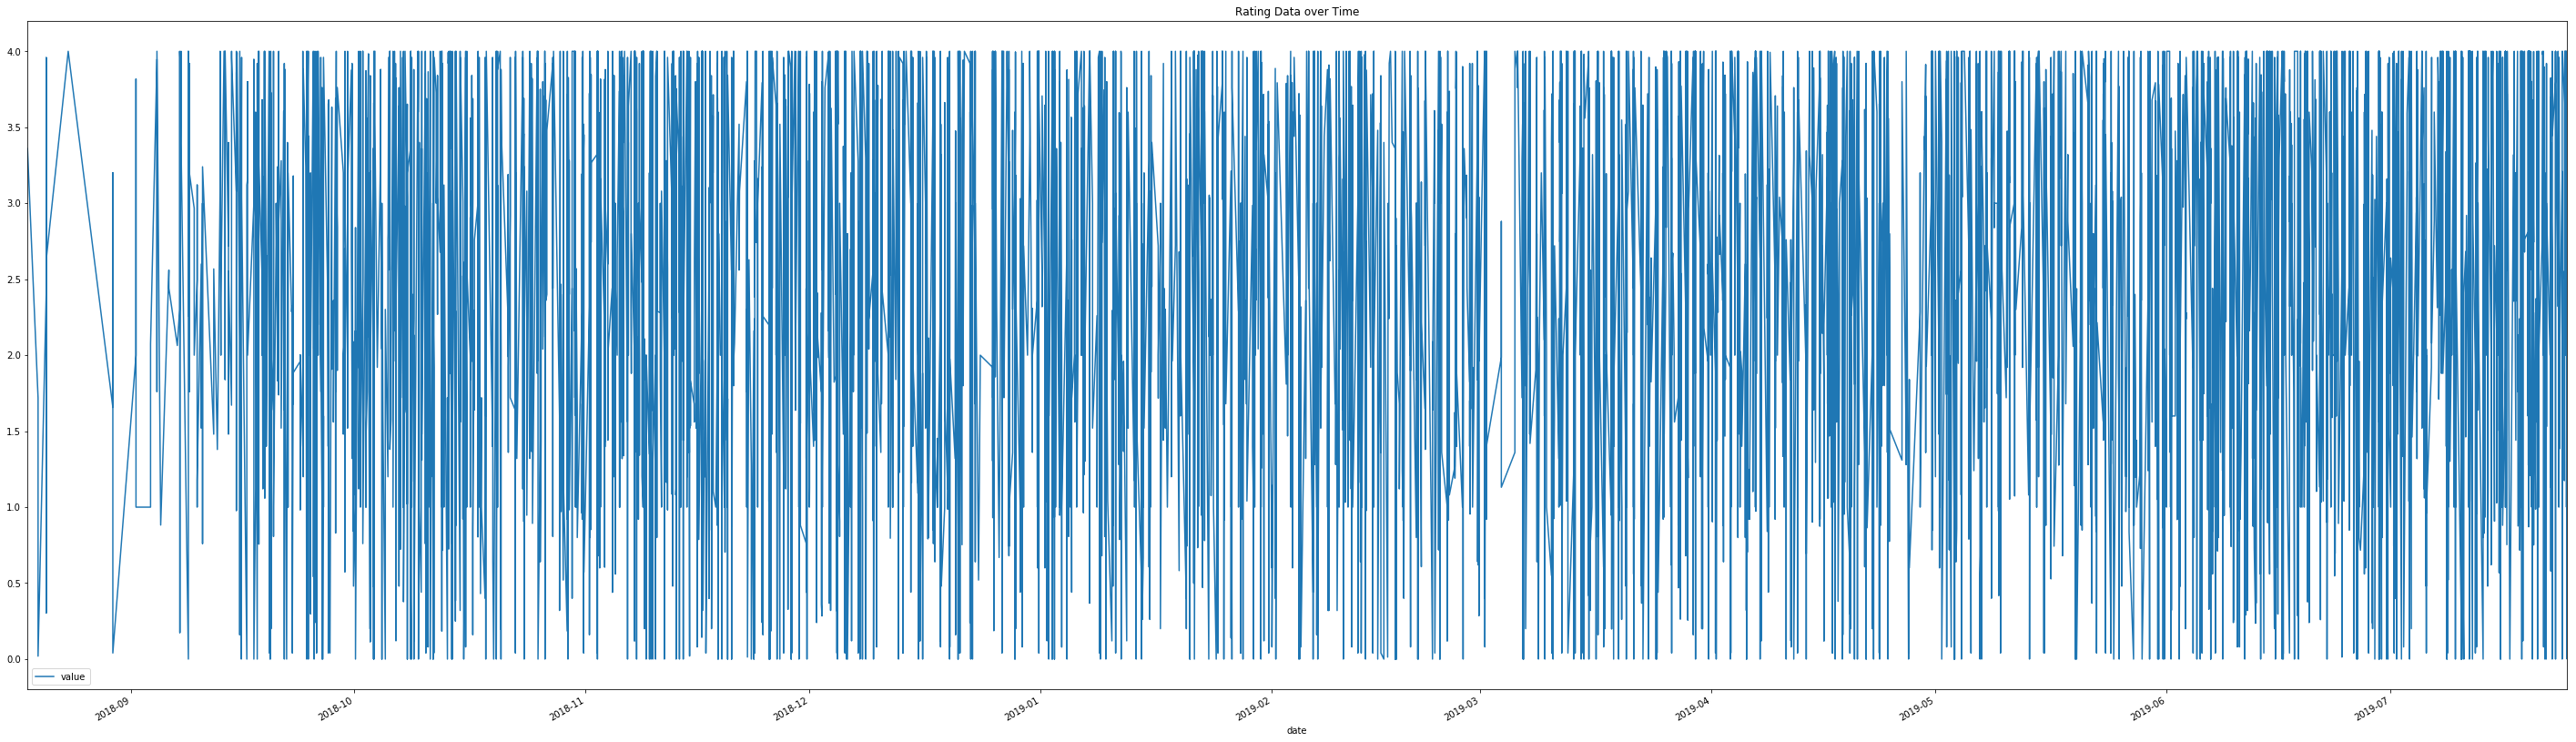

In [9]:
#For looking at the time series data, a quick graph may be the fastest route

#Note that this graph is fairly basic as this is just an initial data exploration.  More details could be added to this graph
#and time series data could be parsed by specific hour, user_id, etc. and made to look "prettier"
subj_measures.plot(x='date', y='value', figsize=(50,15), title='Rating Data over Time')

plt.legend(loc="lower left")

plt.show()

Upon initial views of values of time, it looks like there is simply too much variation by patient to truly see progress from this initial data exploration.  Grouping will likely help with this.

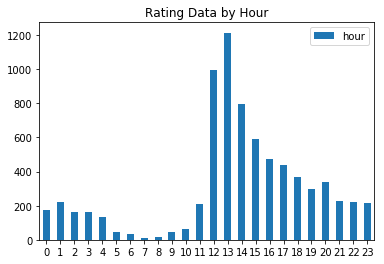

In [10]:
#Let's try to segment further and see if there's a most frequent hour, day or month for user entry
subj_measures['hour'].value_counts().sort_index().plot.bar(title='Rating Data by Hour')

plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.figsize=(50,15)

plt.show()

Here, it looks like the most frequent entry time is in the early afternoon.  This may indicate patients do this during lunch at work or during free time.  This also may indicate that fewer patients are willing or able to provide entries when they first wake up.

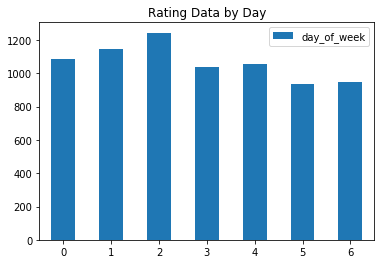

In [11]:
subj_measures['day_of_week'].value_counts().sort_index().plot.bar(title='Rating Data by Day')

plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.figsize=(50,15)

plt.show()

Entry by day of the week is fairly uniform, which is great to see, considering this should be a daily practice for patients.  Unsurpringly the least frequent entry days are Saturday and Sunday, when patients are most likely to have schedule variations compared to weekdays as they complete weekend activities, etc.

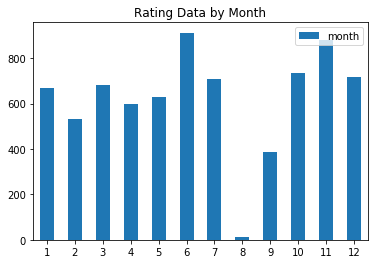

In [12]:
subj_measures['month'].value_counts().sort_index().plot.bar(title='Rating Data by Month')

plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.figsize=(50,15)

plt.show()

There does not appear to be a strong pattern to entry by month of the year, so seasonality likely plays a small or no role in patient entry frequency, though seasonality may still affect ratings' values. Note that August has the fewest entries as there was only data for August 18th, 2018 through July 2019.

In [13]:
#Because there are various types, let's group by type to see if this changes how we observe patient information
subj_measures_g1 = subj_measures.groupby('type').mean()
subj_measures_g1 = subj_measures_g1.drop(['user_id', 'day', 'month'], axis=1)

subj_measures_g1.head()

,value,hour,day_of_week
type,,,
anticipatoryStress,2.495910,13.759036,2.834337
mood,2.404216,13.710038,2.849868
ruminationStress,2.353558,13.477848,2.825949
sleep,2.404878,13.633089,2.879356


Overall, it looks like values are about the same regardless of collection type.  For example, patients' sleep ratings average at approximately 2.4 while their mood rating is around the same.  This could indicate a correlation between the two, perhaps due to time of entry, as well as a correlation between the rest of the ratings.  Interestingly, if the groupby statement is correct, sleep time entry may average around 1pm rather thatn 8am when entry would ideally occur (though further exploration needs to be completed to confirm or deny this).

In [14]:
#Next, let's see if there is any variation in patients, whether that's how many entries they made, difference in value ratings, any outliers in their ratings, etc.
subj_measures_g2 = subj_measures.groupby('user_id').count()[['value']]

subj_measures_g2.rename(columns={'value':'entry_count'}, inplace=True)

print(subj_measures_g2.head(20))
print("")
print(subj_measures_g2.describe())

         entry_count
user_id             
597               49
603              113
650               51
652               71
884               26
932               21
939               37
970               45
1044             279
1074             182
1109             130
1140              47
1173              24
1208              27
1214              28
1260              31
1269             117
1271              20
1309              23
1342              33

       entry_count
count   100.000000
mean     74.600000
std      91.562089
min       9.000000
25%      24.000000
50%      42.500000
75%      75.000000
max     539.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


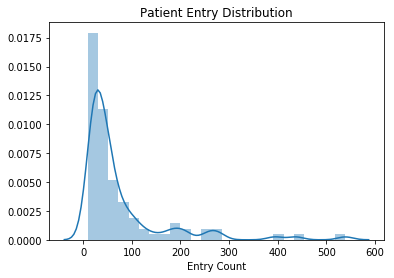

In [15]:
#This may be better shown as a plot
sns.distplot(subj_measures_g2['entry_count'], kde=True, axlabel='Entry Count').set_title('Patient Entry Distribution')

plt.show()

At a glance, it looks like most patients had fewer than 100 entries (mean = 74.6), though some entered as many as 539 ratings, with a fairly large standard deviation.  This could mean there's a large difference in user participation, perhaps having to do with time of day they're asked to enter values.  It may simply be that data was not collected over a long enough period of time for patients to accumulate 100+ entries.  However, given that the avg. entry is significantly greater than 10 per user, it is safe to say we can continue with general statistical analysis of these entries.

In [16]:
#Checking for difference in value rating averages by patient.  Since rating seems fairly similar across types, we can collapse across that field and focus on rating overall per patient
subj_measures['user_id'] = subj_measures['user_id'].astype(str) #converting id to string, as these id values appear to be for patient identification rather than numeric (note this is only for data exploration, as id may be relevant as a number in another situation)

subj_measures_g3 = subj_measures.groupby(['user_id'], as_index=False).mean()

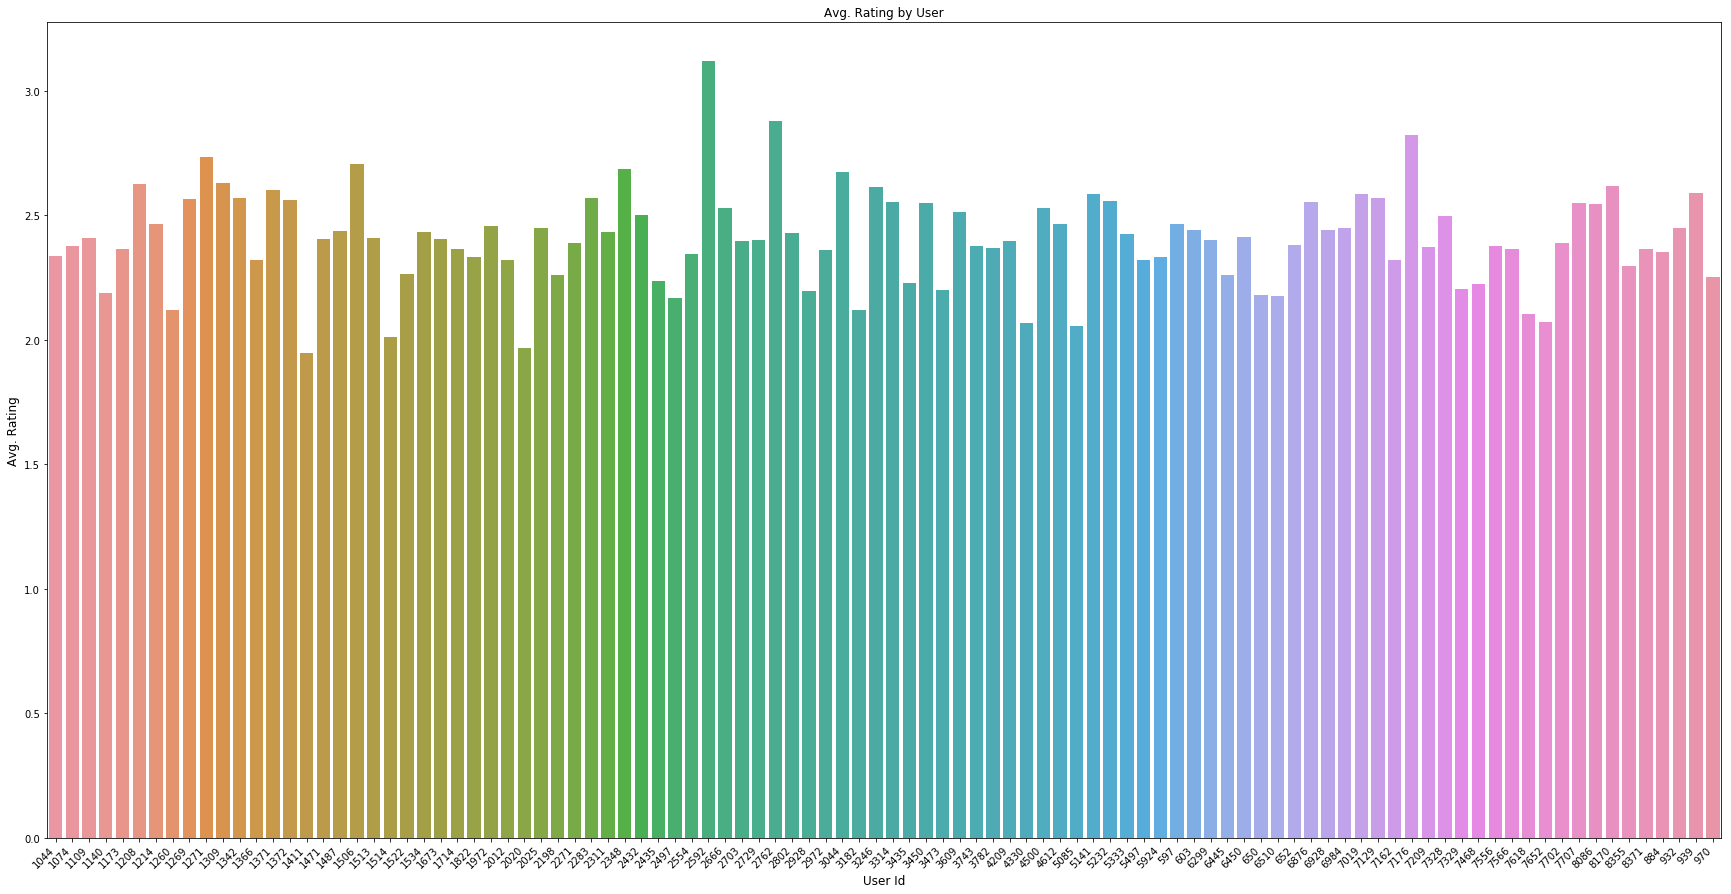

In [17]:
#showing as a plot again for quicker view of information
plt.figure(figsize=(30,15))

avg_rate = sns.barplot(x=subj_measures_g3['user_id'], y=subj_measures_g3['value']).set_title('Avg. Rating by User')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Avg. Rating', fontsize=12)
plt.xlabel('User Id', fontsize=12)

plt.show()

In [18]:
subj_measures_g3[subj_measures_g3['user_id']=='2592'].mean()

user_id        2592.000000
value             3.120080
hour             10.444444
day              18.666667
day_of_week       3.333333
month             7.444444
dtype: float64

As expected from earlier exploration, avg. rating by patient varies a lot.  However, we can see a few with exceptionally high and exceptionally low ratings.  For example, the patient with user id '2592' has one of the highest avg. ratings (3.12).  Looking at this data again over time in the visualization and final analysis, this patient could prove a strong test of potential progress in rating over time.

In [19]:
'''
Let's do a quick check for outliers in the grouped data, 
to see if patients have particularly high or low ratings relative to the rest of the group by 3 std.  
This may also give us seasonal insights.
'''
print(subj_measures_g3[subj_measures_g3['value'] >= ((3*subj_measures_g3['value'].std())+subj_measures_g3['value'].mean())])
print("")
print(subj_measures_g3[subj_measures_g3['value'] <= ((-3*subj_measures_g3['value'].std()) + subj_measures_g3['value'].mean())])

   user_id    value       hour        day  day_of_week     month
39    2592  3.12008  10.444444  18.666667     3.333333  7.444444

Empty DataFrame
Columns: [user_id, value, hour, day, day_of_week, month]
Index: []


While no patients have ratings well below the average, there is one patient, already mentioned, who is well above the norm.  In a more thorough analysis, it would be worth diving deeper into the reasons behind this derivation, as well as expanding "outliers" to include patients within 2 std of the average rating.  For now, we will not remove any outliers.

In [20]:
#After exploring time above, let's delve in deeper, looking at most user entry by hour
subj_measures_g4 = subj_measures.groupby(['user_id', 'hour']).count()[['value']]

subj_measures_g4.rename(columns={'value':'entry_count'}, inplace=True)

subj_measures_g4.head(23)

entry_count
user_id hour             
1044    0               5
        1               7
        2               7
        3               5
        4               9
        5               2
        6               1
        8               1
        9               4
        10              3
        11              9
        12             35
        13             51
        14             22
        15             24
        16             19
        17             19
        18             12
        19             15
        20             10
        21              4
        22              6
        23              9

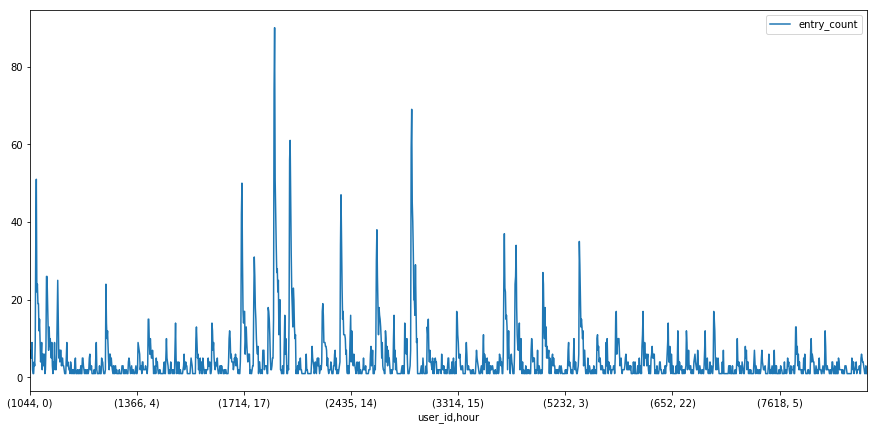

In [21]:
#ploting data for better view of all users
subj_measures_g4.plot(figsize=(15,7))
plt.show()

Based on the current data grouping, this doesn't show us much, as we simply see frequency of entry for certain users at specific hours.  This data needs to be adjusted before final visualization.

In [22]:
#Let's also look at hour by user, to see if users who entered values at certain times had different scores
subj_measures_g5 = subj_measures.groupby(['hour', 'user_id']).count()[['value']]

subj_measures_g5.rename(columns={'value':'entry_count'}, inplace=True)

subj_measures_g5.head(23) #Test Print

entry_count
hour user_id             
0    1044               5
     1074               2
     1109               1
     1140               3
     1173               1
     1214               1
     1260               1
     1269               5
     1309               1
     1366               1
     1371               2
     1372               1
     1411               1
     1471               2
     1487               1
     1514               1
     1522               2
     1534               1
     1714               4
     1822               4
     1972               2
     2012              18
     2025               8

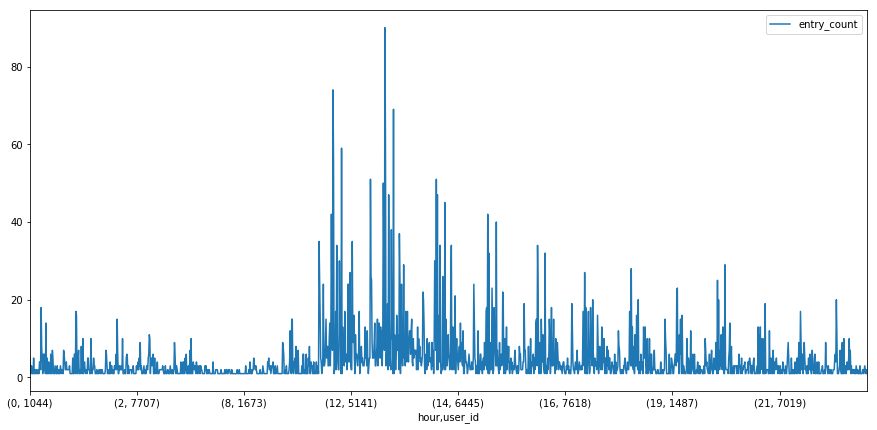

In [23]:
#Ploting data for better view of all users
subj_measures_g5.plot(figsize=(15,7))
plt.show()

Here, we get a slightly better view of patient entry, though it's still hard to see individual patients.  As we saw earlier, it looks like most entries are in the afternoon.

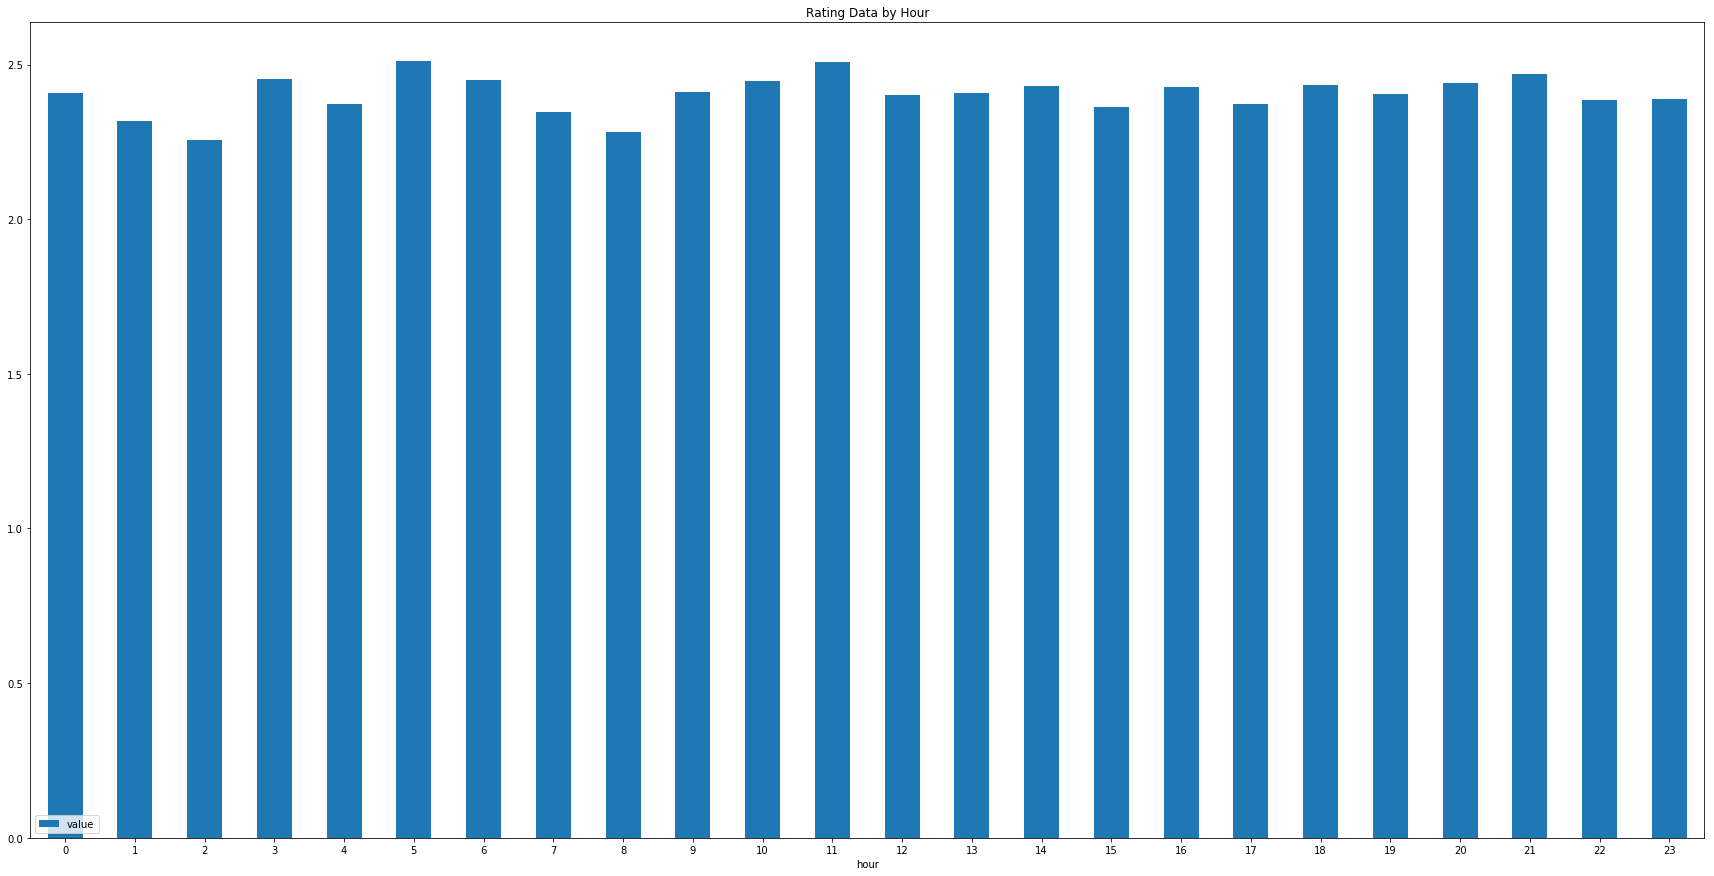

In [24]:
#Next, let's repeat our earlier analysis, but instead of frequency by hour, day and month, let's see ratings over time
subj_measures_g6 = subj_measures.groupby('hour').mean()

subj_measures_g6.head()

subj_measures_g6.reset_index(inplace=True)

subj_measures_g6.plot.bar(x='hour', y='value', figsize=(30,15), title='Rating Data by Hour')

plt.xticks(rotation=0)
plt.legend(loc="lower left")

plt.show()

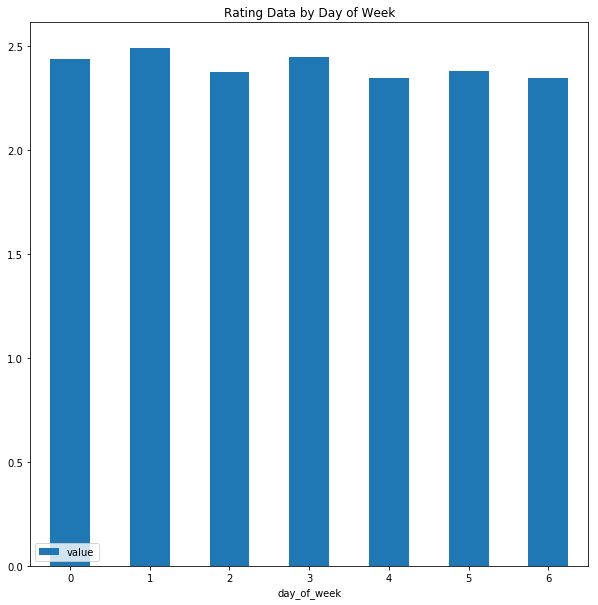

In [25]:
subj_measures_g7 = subj_measures.groupby('day_of_week').mean()

subj_measures_g7.head()

subj_measures_g7.reset_index(inplace=True)

subj_measures_g7.plot.bar(x='day_of_week', y='value', figsize=(10,10), title='Rating Data by Day of Week')

plt.xticks(rotation=0)
plt.legend(loc="lower left")

plt.show()

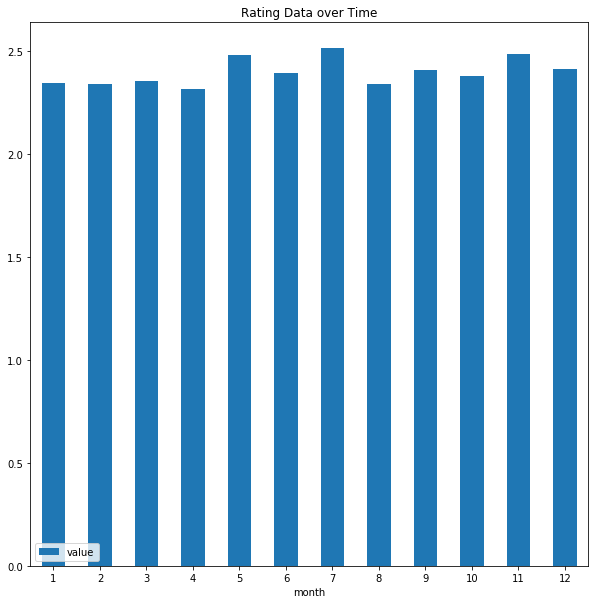

In [26]:
subj_measures_g8 = subj_measures.groupby('month').mean()

subj_measures_g8.head()

subj_measures_g8.reset_index(inplace=True)

subj_measures_g8.plot.bar(x='month', y='value', figsize=(10,10), title='Rating Data over Time')

plt.xticks(rotation=0)
plt.legend(loc="lower left")

plt.show()

Overall, across time by hour, day of week or month, it appears there is no significant difference in rating by time and not much improvement trend in months either (though this may change when further segmented).

In [27]:
#Lastly, let's see if type of rating is related to time of day to see if patients are more likely to enter a specific rating type during a certain time of day
subj_measures_g8 = subj_measures.groupby(['hour', 'type']).mean()

subj_measures_g8 = subj_measures_g8.drop(['day', 'day_of_week', 'month'], axis=1)

subj_measures_g8.head(20)

value
hour type                        
0    anticipatoryStress  2.285692
     mood                2.604294
     ruminationStress    2.950503
     sleep               2.150982
1    anticipatoryStress  2.495664
     mood                2.223207
     ruminationStress    2.131581
     sleep               2.419885
2    anticipatoryStress  2.259138
     mood                2.400454
     ruminationStress    2.504000
     sleep               2.092140
3    anticipatoryStress  2.921166
     mood                2.382226
     ruminationStress    1.709743
     sleep               2.528552
4    anticipatoryStress  2.758465
     mood                2.641359
     ruminationStress    2.584872
     sleep               2.111473

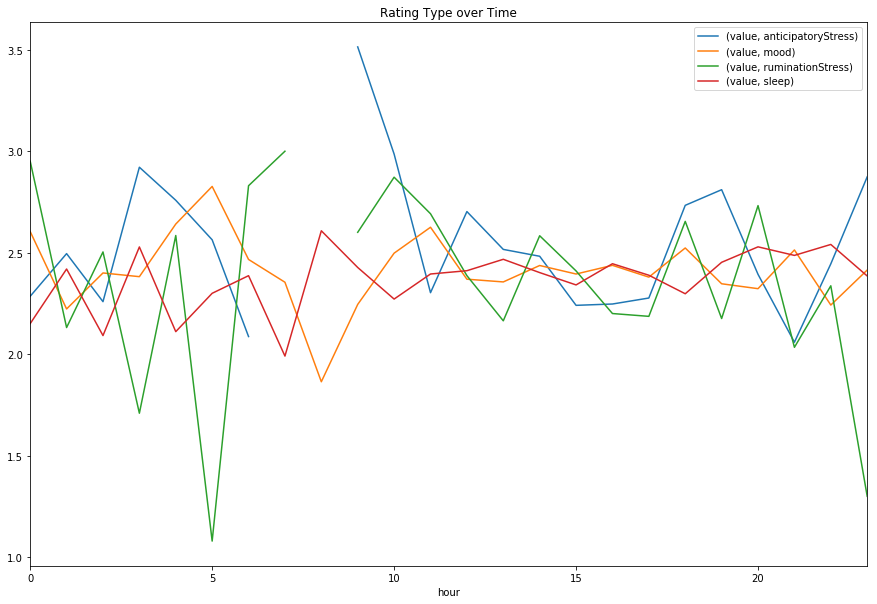

In [28]:
#Now as a plot for better visualization
subj_measures_g8.unstack().plot(title='Rating Type over Time', figsize=(15,10))

plt.legend(loc="upper right")

plt.show()

This may provide the strongest visualization insight so far.  Segmented by type and hour, it appears that anticipatory stress is highest in the early morning (8am or 9am) or late at night (3am or 4am).  At the same time, we see mood ratings decrease in the morning.  This could indicate that many patients wake up feeling worse than they do as the day progresses, which could indicate good times to reach patients with comforting exercises.

## Data Visualization of Patient Progress and Final Analysis

Now that we've explored the data, let's do one last visualization to show patient progress before final insights

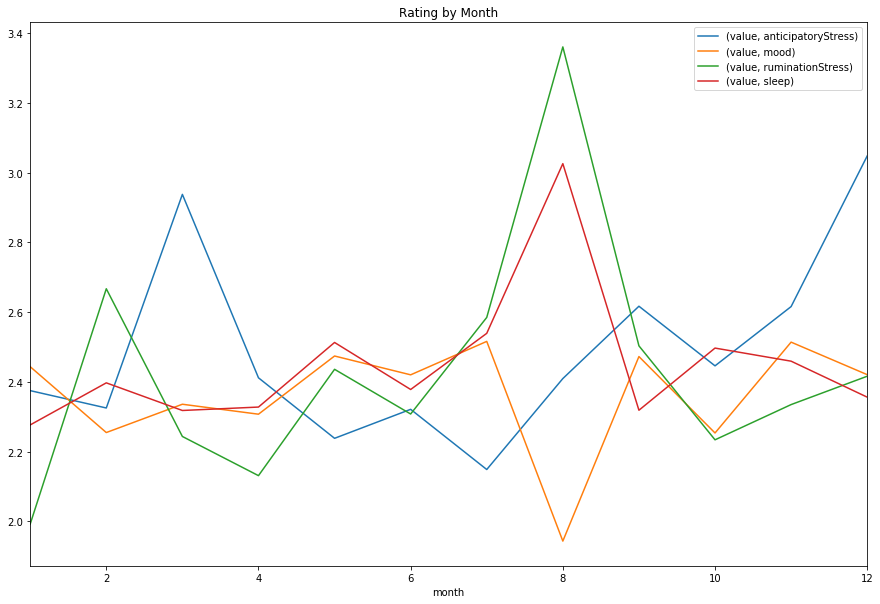

In [29]:
#For this visualization, we'll sort months chronologically (rather than by frequency as above) and review avg. user rating over time, segmented by rating type
subj_measures_g9 = subj_measures.groupby(['month', 'type']).mean()

subj_measures_g9 = subj_measures_g9.drop(['day', 'day_of_week', 'hour'], axis=1)

subj_measures_g9.head(10)

subj_measures_g9.unstack().plot(title='Rating by Month', figsize=(15,10))

plt.legend(loc="upper right")

plt.show()

**Insights from the given data:** Based on the exploration above as well as the final visualization, this data shows many users did not see significant progress in a year, which could be due to any number of factors from frequency of entry, to time of day data was entered, to other aspects of the application not shown in this data.  While this is true across the board, there are some exceptions, as exploration above showed certain patients had fairly high value ratings.  Given time, it would be good to further explore these patients to see why they might have higher ratings than others.  Additionally, we do see a leveling out of ratings around May-June, which could indicate some sort of stabilization towards the end of this period of data collection.  Unsurprinsignly mood ratings are tied to anticipatory stress ratings.  This is somewhat expected as a patient might anticipate their stress levels increasing at a greater rate when they are in a bad mood.

**Additional Assumptions that can be made from the data:** For this quick data analysis, I had to make assumptions including that data was "normal" (i.e. no large chunks of patient data missing and that sample size was large enough).  I also made some assumptions above with correlation, though further statistical testing would need to be completed to determine if there is any stronger connection, causation, etc. between the data.

**Information that may be missing or should be collected:** It could be easier to assess data at a glance if all number ratings were paired with their text equivalent (ex. 0 paired with an entry "Awful").  This would not necessarily help with data analysis in terms of statistical analysis, but certainly makes for faster "at-a-glance" data views.

It may also be helpful to have additional patient data for further analysis such as age, gender, or any information that could further segment the data (assuming proper privacy compliance measures are in place).

Lastly, it would be good to see more before/after affects.  For example, I would be curious to see how the data changes when we see patients' ratings made after completing NeuroFlow's behavioral exercises (ex. meditation or journaling) or after a visit with a therapist or a physician.  This could paint a stronger picture of the effects of the app on patients progress over time in addition to patient ratings at set times of day.